# ------------------------------------------------------------------------------
# MIDTERM PROJECT: DATA SCIENCE WITH PYTHON
# ------------------------------------------------------------------------------
#
# 1. PROJECT OVERVIEW AND OBJECTIVES
#
#   1.1 Select a Dataset
#       - Requirement: Choose a dataset not used in class. 
#         It can come from public data repositories (e.g., Kaggle, 
#         UCI Machine Learning Repository, government portals).
#       - Tip: Pick a dataset that interests your group and has 
#         enough complexity to warrant cleaning, EDA, and modeling.
#
#   1.2 Primary Goal                                                                    Noel 
#       - Apply data science concepts—data cleaning, visualization, modeling,
#         and evaluation—to gain insights and showcase Python proficiency.
#
# ------------------------------------------------------------------------------
# 2. PROJECT TASKS IN DETAIL
# ------------------------------------------------------------------------------
#
# 2.1 Acquire, Clean, and Preprocess Data
#
#   (a) Data Acquisition
#       - Identify your data source: file-based (CSV, JSON), database, API, etc.
#       - Document how you obtained it. For example, if from an API, show the request.
#
#   (b) Data Cleaning
#       - Tasks: Handle missing values, remove duplicates, correct invalid entries.
#       - Python Tools: pandas methods (isnull, dropna, fillna, etc.).
#       - Tips: Always justify your decisions, e.g., why dropping vs. imputing missing values.
#
#   (c) Data Preprocessing
#       - Requirement: Use at least 2 preprocessing techniques 
#         (scaling, encoding, feature engineering, etc.).
#       - Tips: Ensure numeric vs. categorical variables are appropriately transformed.
#
# ------------------------------------------------------------------------------
# 2.2 Perform Exploratory Data Analysis (EDA) and Visualize Key Insights
#
#   (a) Exploratory Data Analysis                                                       Enrique and Laura   
#       - Compute basic stats (mean, median, std, etc.).
#       - Identify correlations, outliers, or data imbalances.
#       - Use pandas describe(), info(), corr() for an overview.
#
#   (b) Data Visualization                                                              Laura and Enrique 
#       - Requirement: At least 3 different visualization techniques (histogram, 
#         scatter plot, box plot, heatmap, etc.).
#       - Tips: Use clear labels, titles, and legends. Let visuals drive your EDA narrative.
#
# ------------------------------------------------------------------------------
# 2.3 Build and Evaluate a Machine Learning Model
#
#   (a) Model Building                                                                  Noel and Phat
#       - Requirement: At least 2 different ML algorithms 
#         (e.g., Logistic Regression, Random Forest, Linear Regression, etc.).
#       - Tips: Match the algorithm type to your target variable 
#         (classification vs. regression).
#
#   (b) Model Evaluation                                                                Noel and Phat
#       - Requirement: At least 2 different evaluation metrics 
#         (accuracy, precision/recall, F1, RMSE, MAE, etc.).
#       - Tips: Present numeric results and interpret them in plain English. 
#         Consider basic hyperparameter tuning.
#
# ------------------------------------------------------------------------------
# 3. DELIVERABLES
# ------------------------------------------------------------------------------
#
#   3.1 Code                                                                Phat- Completed
#       - A well-commented Python script or Jupyter Notebook with:
#         * Data acquisition, cleaning, preprocessing                       Noel
#         * EDA and visualizations                                          Laura and Enrique will add more 
#         * Model building, training, and evaluation                        Phat and Noel 
#       - Ensure reproducibility. Include data or instructions to access it.
#
#   3.2 Report (Due in 3 Weeks)                                             Danila create document
#       - Structure:
#         1) Introduction to the Dataset
#         2) Data Cleaning & Preprocessing Steps
#         3) EDA & Key Insights
#         4) Model Building & Evaluation
#         5) Conclusion
#         6) References (if any)
#
# ------------------------------------------------------------------------------
# 4. TEAM COLLABORATION AND SUBMISSION TIPS
# ------------------------------------------------------------------------------
#
#   (a) Group Roles
#       - Decide early who focuses on which aspect: data cleaning, modeling, etc.
#       - Use Git or a similar VCS to merge changes and maintain a single codebase.
#
#   (b) Progress Milestones
#       - Week 1: Finalize dataset, do initial cleaning and EDA.
#       - Week 2: Refine preprocessing, build and evaluate at least one model.
#       - Week 3: Complete second model, finalize visualizations, write report.
#
#   (c) Version Control
#       - Commit frequently, use branches for different tasks, review each other's code.
#
#   (d) Polish and Professionalism
#       - Keep code readable and well-structured (clear variable names, function docstrings).
#       - Proofread your report, ensure visualizations are well-labeled.
#
# ------------------------------------------------------------------------------
# 5. PUTTING IT ALL TOGETHER
# ------------------------------------------------------------------------------
#
# By following this guide, your group will:
#   - Acquire data from a new source and thoroughly clean it.
#   - Preprocess it (e.g., scaling, encoding, feature engineering) as needed.
#   - Conduct an informative EDA with multiple visualizations.
#   - Train at least two machine learning models, evaluate them with multiple metrics.
#   - Compile findings in a concise, well-organized final report.
#
# Good luck with your data exploration and modeling!
# ------------------------------------------------------------------------------

Import All Library & Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC



Setting Visualization Format

In [3]:
# Set maximum number of columns to show
pd.set_option('display.max_columns', None)

# Set maximum width of each column
pd.set_option('display.max_colwidth', None)

# Set the total width of the display (increase as needed)
pd.set_option('display.width', 1000)



## Import Dataset

In [4]:
import os
file_path = os.path.join(os.getcwd(), 'WineQT.csv')

In [5]:
#import csv file, Drop ID column
df = pd.read_csv(file_path)
df = df.drop('Id',axis=1)
#print few few rows of data
print(df.head(10))


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  quality
0            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5
1            7.8              0.88         0.00             2.6      0.098                 25.0                  67.0   0.9968  3.20       0.68      9.8        5
2            7.8              0.76         0.04             2.3      0.092                 15.0                  54.0   0.9970  3.26       0.65      9.8        5
3           11.2              0.28         0.56             1.9      0.075                 17.0                  60.0   0.9980  3.16       0.58      9.8        6
4            7.4              0.70         0.00             1.9      0.076                 11.0                  34.0   0.9978  3.51       0.56      9.4        5
5            7.4            

## Exploratory Data Analysis and Cleaning

In [6]:
duplicates = df[df.duplicated()]
print(duplicates)




      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  quality
4               7.4             0.700         0.00            1.90      0.076                 11.0                  34.0  0.99780  3.51       0.56      9.4        5
46              7.2             0.725         0.05            4.65      0.086                  4.0                  11.0  0.99620  3.41       0.39     10.9        5
64              8.6             0.490         0.28            1.90      0.110                 20.0                 136.0  0.99720  2.93       1.95      9.9        6
65              7.7             0.490         0.26            1.90      0.062                  9.0                  31.0  0.99660  3.39       0.64      9.6        5
71              8.1             0.545         0.18            1.90      0.080                 13.0                  35.0  0.99720  3.30       0.59      9.0        6
...       

In [7]:
#Drop duplicate rows
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [8]:
#datatype check
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1018 non-null   float64
 1   volatile acidity      1018 non-null   float64
 2   citric acid           1018 non-null   float64
 3   residual sugar        1018 non-null   float64
 4   chlorides             1018 non-null   float64
 5   free sulfur dioxide   1018 non-null   float64
 6   total sulfur dioxide  1018 non-null   float64
 7   density               1018 non-null   float64
 8   pH                    1018 non-null   float64
 9   sulphates             1018 non-null   float64
 10  alcohol               1018 non-null   float64
 11  quality               1018 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 95.6 KB
None


## Dataset has 1,018 rows and 12 variables


In [9]:
#dataframe shape
print(f'DF Shape : \n{df.shape}')

DF Shape : 
(1018, 12)


In [10]:
#Missing value check
print(df.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Text(0.5, 1.0, 'Wine Quality Correlation Heatmap')

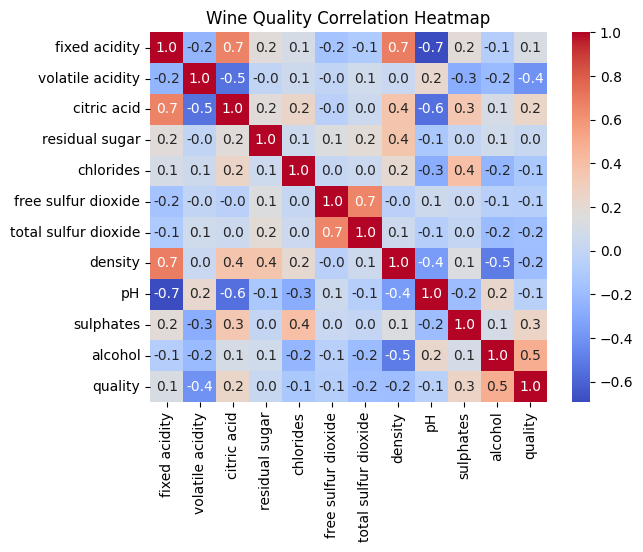

In [11]:
#dataset correlation
Corr = df.corr()
sns.color_palette("crest", as_cmap=True)
sns.heatmap(data = Corr, cmap = 'coolwarm',annot = True, fmt = '.1f')
plt.title('Wine Quality Correlation Heatmap')

Looking at the heatmap, 
    - We see that alcohol level (direct 0.5), volatile acidity(inverse -0.4 ) are moderately correlated with quality.
    - pH level is strongly correlated with fixed acidity (-0.7) and citric acid level (-0.6).
    - Fixed acidity is strongly correlated (0.7) with density.
    - Sulphate is moderately correlated with chlorindes (0.4) level.


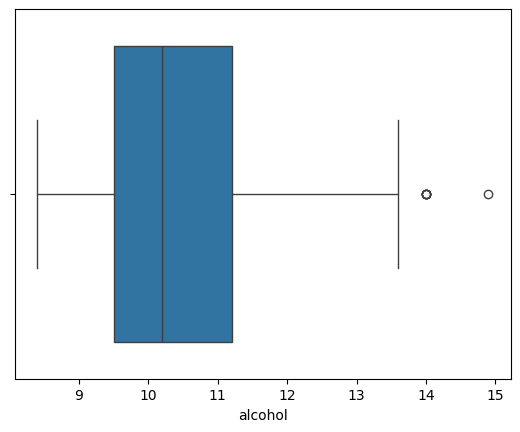

In [12]:
#sns.pairplot(data =df)
sns.boxplot(x= df['alcohol'])
plt.show()


In [13]:
outlier = df[df['alcohol'] >13.5]
print(outlier.shape)


(11, 12)


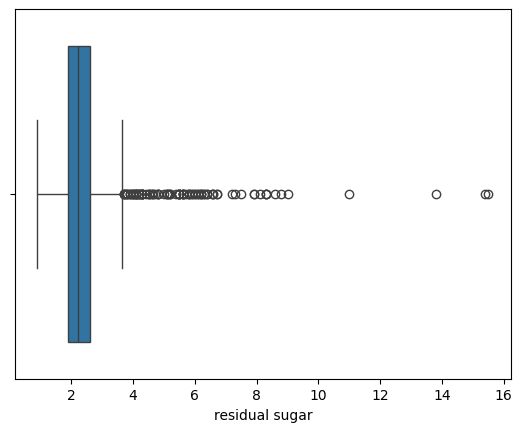

In [14]:
#residual sugar outlier
sns.boxplot(x= df['residual sugar'])
plt.show()

In [15]:
outlier = df[df['residual sugar'] >4]
print(outlier.shape)

(81, 12)


In [16]:
#Average statistic per level group
Qual = df.groupby('quality').mean().reset_index()
print(Qual)

   quality  fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  sulphates    alcohol
0        3       8.450000          0.897500     0.211667        2.666667   0.105333             8.166667             24.500000  0.997682  3.361667   0.550000   9.691667
1        4       7.809091          0.700000     0.165758        2.566667   0.094788            14.848485             40.606061  0.996669  3.391212   0.637879  10.260606
2        5       8.134642          0.587436     0.239307        2.527252   0.091880            16.766744             56.001155  0.997041  3.304088   0.614573   9.912702
3        6       8.328117          0.504731     0.269633        2.444010   0.085687            15.221271             40.097800  0.996597  3.320929   0.674328  10.669030
4        7       8.775410          0.390615     0.382049        2.750410   0.074697            14.213115             37.459016  0.995946  3.290164   0.7440


## Train Test Split

In [17]:
X = df.drop('quality', axis=1)
y = df['quality']

In [18]:
mi_scores = mutual_info_classif(X, y, discrete_features=False)

#### Mutal Information for Feature Selection Evaluation

In [19]:
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values('MI Score', ascending=False)

In [20]:
print(mi_df)

                 Feature  MI Score
10               alcohol  0.179602
1       volatile acidity  0.098953
9              sulphates  0.087483
6   total sulfur dioxide  0.077844
2            citric acid  0.040242
7                density  0.038216
0          fixed acidity  0.025021
5    free sulfur dioxide  0.011650
4              chlorides  0.007387
3         residual sugar  0.006287
8                     pH  0.000000


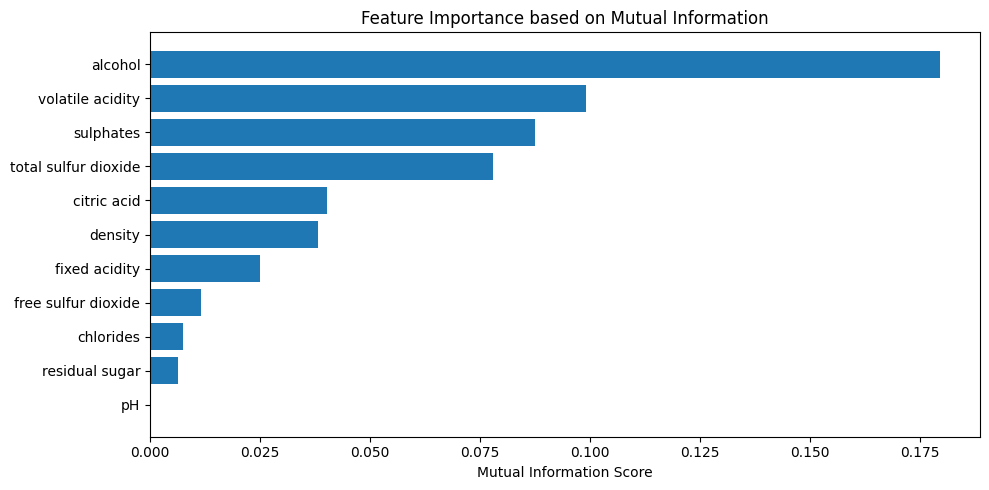

In [21]:
plt.figure(figsize=(10, 5))
plt.barh(mi_df['Feature'], mi_df['MI Score'])
plt.xlabel("Mutual Information Score")
plt.title("Feature Importance based on Mutual Information")
plt.gca().invert_yaxis()  # Highest scores at the top
plt.tight_layout()
plt.show()

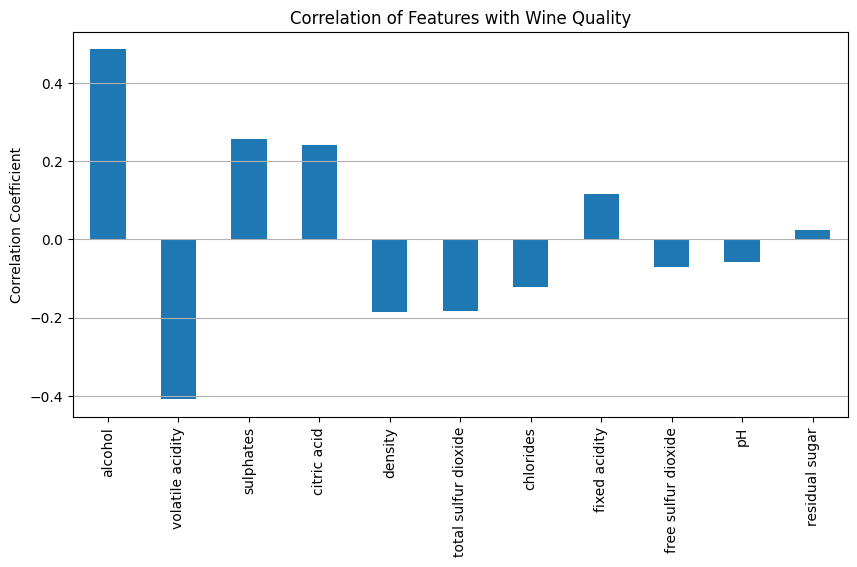

In [22]:
#Correlation between quality and all x variables
quality_corr = Corr['quality'].drop('quality').sort_values(key=abs, ascending=False)

# Plot as bar chart
plt.figure(figsize=(10, 5))
quality_corr.plot(kind='bar')
plt.title('Correlation of Features with Wine Quality')
plt.ylabel('Correlation Coefficient')
plt.grid(axis='y')
plt.show()

In [23]:
quality_corr = Corr['fixed acidity']
print(quality_corr)

fixed acidity           1.000000
volatile acidity       -0.236894
citric acid             0.668178
residual sugar          0.173726
chlorides               0.102446
free sulfur dioxide    -0.152582
total sulfur dioxide   -0.100716
density                 0.683120
pH                     -0.692597
sulphates               0.181277
alcohol                -0.077624
quality                 0.115826
Name: fixed acidity, dtype: float64


In [24]:
#Since your data is imballacned accross 6 class of wine quality, we filter down to just two most represented group which are 5 and 6.
df_balanced = df[(df['quality']==5) | (df['quality']==6) ]

In [25]:
print(df.groupby('quality').size())
print(df_balanced.groupby('quality').size())

quality
3      6
4     33
5    433
6    409
7    122
8     15
dtype: int64
quality
5    433
6    409
dtype: int64


In [26]:
#Define X variables and y variables
X_balanced = df_balanced.drop('quality', axis=1)
y_balanced = df_balanced['quality']

#Data Normalization
from sklearn.preprocessing import MinMaxScaler



In [27]:
#Logistic regression model Train 70% And Test 30%
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Initialize the scaler
#scaler = StandardScaler()

# Fit on training data and transform both sets
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [28]:
#Fit the train data into model
model = LogisticRegression( solver='lbfgs')
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
#Making predictions
y_pred = model.predict(X_test)

In [30]:
# Get feature names (from original X)
feature_names = X.columns

# Get coefficients and intercept from the trained model
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Create DataFrame of features and their effects
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

                 Feature  Coefficient
9              sulphates     1.260712
10               alcohol     0.632186
0          fixed acidity     0.062314
5    free sulfur dioxide     0.020751
3         residual sugar     0.007639
6   total sulfur dioxide    -0.019357
8                     pH    -0.297099
4              chlorides    -0.413280
2            citric acid    -0.700635
7                density    -1.407901
1       volatile acidity    -2.172544


The positive coefients tell us that the higher the attribute the more likely the wine quality is class 6 and vice versa

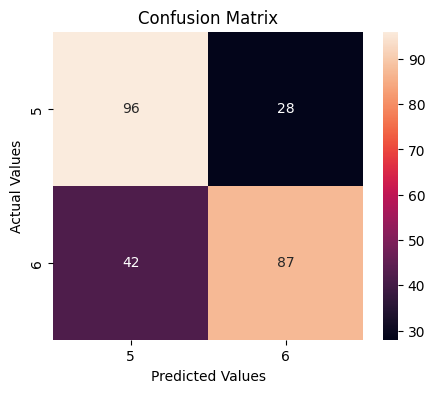

In [31]:
#Model Evaluationw with Confusion Matrix
lables = [5,6]
cm = confusion_matrix(y_test,y_pred, labels= lables)

cm_df = pd.DataFrame(cm, index = [5,6],
                     columns = [5,6])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot= True,fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [32]:
#Prediction Accuracy
print(f'By Adding the true predictions  of class 5 and 6 then devided by all predictions that the model predicted, we have accuracy score of {accuracy_score(y_test,y_pred)*100:.2f}%')


By Adding the true predictions  of class 5 and 6 then devided by all predictions that the model predicted, we have accuracy score of 72.33%


In [33]:
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           5       0.70      0.77      0.73       124
           6       0.76      0.67      0.71       129

    accuracy                           0.72       253
   macro avg       0.73      0.72      0.72       253
weighted avg       0.73      0.72      0.72       253



In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [36]:
y_pred = model.predict(X_test_scaled)

In [37]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           5       0.66      0.76      0.70       124
           6       0.73      0.62      0.67       129

    accuracy                           0.69       253
   macro avg       0.69      0.69      0.69       253
weighted avg       0.69      0.69      0.69       253



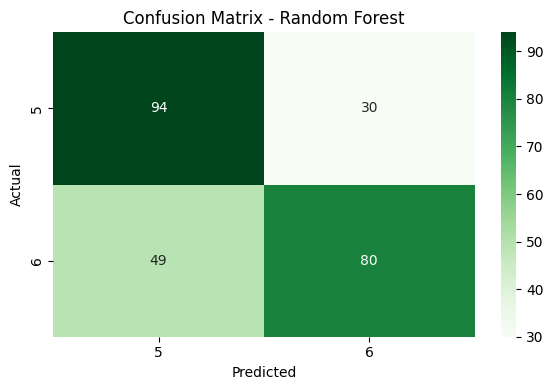

In [38]:
cm = confusion_matrix(y_test, y_pred, labels=[5, 6])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=[5, 6], yticklabels=[5, 6])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

In [39]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
#Support Vector Machine
# Hyperparameter tuning for C
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(SVC(kernel='rbf', random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [41]:
# Best model
best_svm = grid_search.best_estimator_
print("Best C value:", grid_search.best_params_['C'])

Best C value: 0.1


In [42]:
# Predict and evaluate
y_pred = best_svm.predict(X_test_scaled)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           5       0.65      0.84      0.73       124
           6       0.79      0.57      0.66       129

    accuracy                           0.70       253
   macro avg       0.72      0.71      0.70       253
weighted avg       0.72      0.70      0.70       253



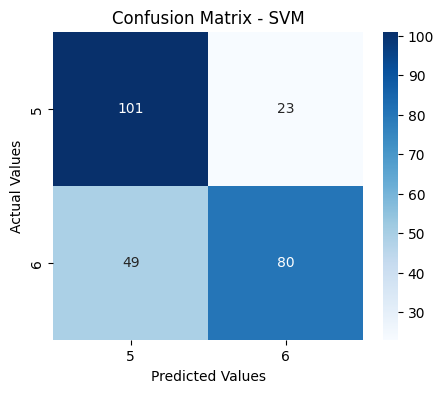

Accuracy score: 71.54%


In [43]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate using confusion matrix
labels = [5, 6]
cm = confusion_matrix(y_test, y_pred_svm, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy score: {accuracy * 100:.2f}%')

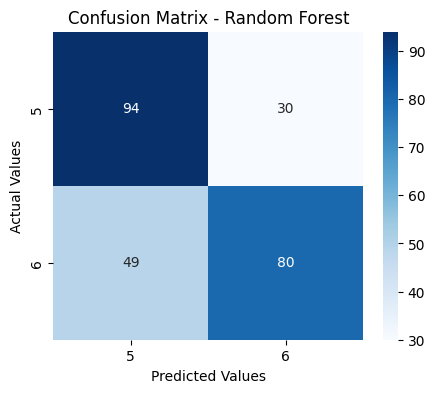

Accuracy score (Random Forest): 68.77%


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate using confusion matrix
labels = [5, 6]
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=labels)
cm_rf_df = pd.DataFrame(cm_rf, index=labels, columns=labels)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy score (Random Forest): {accuracy_rf * 100:.2f}%')

Summary of model training and prediction:

- Due to the small size in term of predictors - X attributes and small imballanced data size for different quality level, we included all X attributes and only keep class 5 and 6 and drop insignificant size classes.
- Logistic regression provides the higest accuracy score 72.33% vs. SVM or random forest. 
- We performed tuning c parameter for SVM and found best one at 0.1.